In [121]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import ticker


In [122]:
# Load the CSV file
file_path = '../experiment_progress_vgg16.csv'
file_path_vit = '../experiment_progress_vit.csv'
data = pd.read_csv(file_path)
data_vit = pd.read_csv(file_path_vit)

In [123]:
# Set global plot style settings
plt.rcParams['axes.grid'] = False  # Disable grid for all plots
plt.rcParams['axes.facecolor'] = 'white'  # Set background color to white
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white
sns.set_style("white")  # Use Seaborn's white style to remove spines by default
sns.despine()  # Remove all spines globally

<Figure size 640x480 with 0 Axes>

# Scheduling decision for VGG16

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\1882764091.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splinter_latency_data_vgg16['type'] = splinter_latency_data_vgg16['layer'].apply(
C:\Users\danie\AppData\Local\Temp\ipykernel_26172\1882764091.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splinter_latency_data_vit['type'] = splinter_latency_data_vit['layer'].apply(


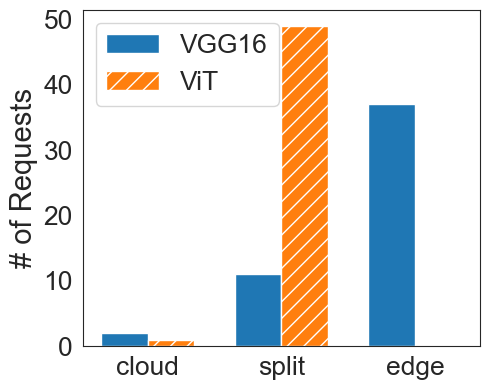

In [124]:
# Process both datasets similarly by adding a 'type' column for both strategies
# VGG16
splinter_latency_data_vgg16 = data[data['strategy'] == 'splinter:latency']
splinter_latency_data_vgg16['type'] = splinter_latency_data_vgg16['layer'].apply(
    lambda x: 'cloud' if x == 0 else ('edge' if x == 22 else 'split')
)
splinter_latency_counts_vgg16 = splinter_latency_data_vgg16['type'].value_counts()

# ViT (adjust layer index for ViT as necessary)
splinter_latency_data_vit = data_vit[data_vit['strategy'] == 'splinter:latency']
splinter_latency_data_vit['type'] = splinter_latency_data_vit['layer'].apply(
    lambda x: 'cloud' if x == 0 else ('edge' if x == 19 else 'split')
)
splinter_latency_counts_vit = splinter_latency_data_vit['type'].value_counts()


# Combine the data into a single dataframe for plotting
count_df = pd.DataFrame({
    'vgg16': splinter_latency_counts_vgg16,
    'vit': splinter_latency_counts_vit,
}).fillna(0)  # Fill NaN values with 0


# Reorder to 'cloud', 'split', 'edge'
count_df = count_df.reindex(['cloud', 'split', 'edge'])

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Initialize figure for the grouped bar plot
fig, ax = plt.subplots(figsize=(5,4))

# Plot the grouped bar chart for both strategies
width = 0.35  # Width of the bars
positions = range(len(count_df.index))  # Positions for the bars

ax.bar([p - width/2 for p in positions], count_df['vgg16'], 
       width=width, label='VGG16', color='tab:blue')
ax.bar([p + width/2 for p in positions], count_df['vit'], 
       width=width, label='ViT', color='tab:orange', hatch="//")


# Setting labels, ticks, and legend
ax.set_ylabel("# of Requests", fontsize=label_font_size)
ax.set_xticks(range(len(count_df.index)))
ax.set_xticklabels(count_df.index, rotation=0, fontsize=tick_font_size)
ax.tick_params(axis='both', labelsize=tick_font_size)
ax.legend(fontsize=legend_font_size)

# Layout adjustments and display
fig.tight_layout()
plt.savefig('splinter_decision_both.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

In [166]:
count_df

,vgg16,vit
type,,
cloud,2,1.0
split,11,49.0
edge,37,0.0


# Latency for VGG16

In [167]:
37/50

0.74

In [125]:
# Replace 'splinter:latency' with 'splinter' in the data
data['strategy'] = data['strategy'].replace({'splinter:latency': 'splinter'})
data = data[data['strategy'] != 'splinter:latency_exhaustive']

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\272532901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


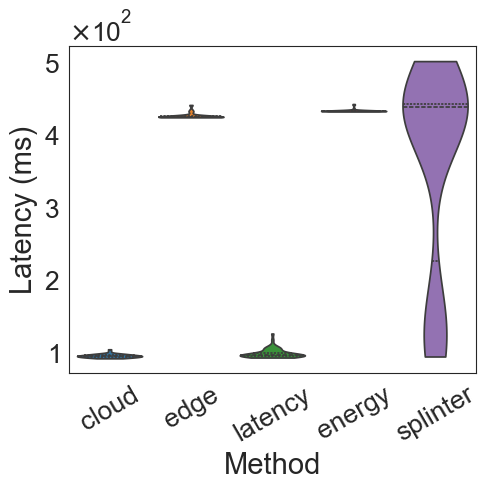

In [126]:


# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['cloud', 'edge', 'latency', 'energy', 'splinter']
palette_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='latency',
    data=data,
    ax=ax,
    inner='quart',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    #saturation=1,
    #linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('Latency (ms)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('latency_vgg16.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [134]:
data

,accuracy,latency,energy,avg energy edge (J),avg latency edge (ms),avg latency cloud (ms),avg latency transfer (ms),avg energy cloud (J),avg energy cloud gpu (J),utilization cloud cpu (%),...,utilization edge cpu (%),tensor size (KB),index,qos,strategy,cpu-freq,layer,edge-accelerator,server-accelerator,violation
0,0.605,94.045685,66.865767,0.422354,9.135057,73.799887,11.110741,66.443413,4.767791,1.7,...,84.2,588.025391,0,94.790671,cloud,1800,0,off,True,-0.744986
1,0.605,96.290614,67.632682,0.400801,10.727318,74.703337,10.859959,67.231880,4.819264,1.7,...,93.8,588.025391,0,94.790671,latency,1200,0,off,True,1.499943
2,0.605,95.300057,67.018486,0.395454,10.815019,73.977872,10.507166,66.623032,4.777545,1.7,...,93.6,588.025391,0,94.790671,splinter,1200,0,off,True,0.509386
3,0.603,436.007522,2.920772,2.920772,436.007513,0.000000,0.000000,0.000000,0.000000,0.0,...,35.6,0.000000,0,94.790671,edge,1800,22,max,False,341.216851
4,0.603,443.560717,2.953182,2.953182,443.560706,0.000000,0.000000,0.000000,0.000000,0.0,...,35.3,0.000000,0,94.790671,energy,800,22,std,False,348.770046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.603,425.654104,2.415110,2.415110,425.654094,0.000000,0.000000,0.000000,0.000000,0.0,...,12.6,0.000000,32,397.085066,edge,1800,22,max,False,28.569038
246,0.603,425.632542,2.416288,2.416288,425.632532,0.000000,0.000000,0.000000,0.000000,0.0,...,12.5,0.000000,41,901.276402,edge,1800,22,max,False,-475.643861
247,0.603,434.164953,2.413542,2.413542,434.164941,0.000000,0.000000,0.000000,0.000000,0.0,...,12.6,0.000000,41,901.276402,energy,800,22,std,False,-467.111450
248,0.603,432.913239,2.437498,2.437498,432.913229,0.000000,0.000000,0.000000,0.000000,0.0,...,12.6,0.000000,48,1074.011455,edge,1800,22,max,False,-641.098216


In [135]:
data_vit

,accuracy,latency,energy,avg energy edge (J),avg latency edge (ms),avg latency cloud (ms),avg latency transfer (ms),avg energy cloud (J),avg energy cloud gpu (J),utilization cloud cpu (%),...,utilization edge cpu (%),tensor size (KB),index,qos,strategy,cpu-freq,layer,edge-accelerator,server-accelerator,violation
0,0.699,133.558466,92.414886,0.408408,20.797592,101.390802,11.370072,92.006477,6.811839,1.7,...,39.0,588.025391,0,3527.273185,cloud,1800,0,off,True,-3393.714719
1,0.699,3920.604365,18.429247,18.429247,3920.604355,0.000000,0.000000,0.000000,0.000000,0.0,...,25.1,0.000000,0,3527.273185,edge,1800,19,off,False,393.331179
2,0.699,4389.100825,81.720108,18.627129,4308.991191,70.183806,9.925828,63.092979,4.192639,1.7,...,25.1,591.021484,0,3527.273185,energy,1600,16,off,True,861.827640
3,0.699,115.834311,89.464961,0.367373,8.289239,97.251392,10.293680,89.097588,6.657328,1.7,...,86.3,588.025391,0,3527.273185,latency,1400,0,off,True,-3411.438874
4,0.699,3292.544531,85.513648,12.342177,3201.422681,80.598549,10.523301,73.171471,5.154576,1.8,...,25.2,591.021484,0,3527.273185,splinter,1200,11,off,True,-234.728654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.699,116.821433,91.563015,0.359883,7.897914,97.255319,11.668200,91.203133,6.651376,1.8,...,79.4,588.025391,49,1606.246871,cloud,1800,0,off,True,-1489.425437
246,0.699,3931.437443,16.829175,16.829175,3931.437433,0.000000,0.000000,0.000000,0.000000,0.0,...,25.1,0.000000,49,1606.246871,edge,1800,19,off,False,2325.190573
247,0.699,4387.318777,81.503486,16.881820,4305.078177,71.361945,10.878654,64.621666,4.291741,1.7,...,25.1,591.021484,49,1606.246871,energy,1600,16,off,True,2781.071906
248,0.699,119.894860,92.168995,0.336231,8.321528,100.018056,11.555276,91.832764,6.903023,1.7,...,86.1,588.025391,49,1606.246871,latency,1400,0,off,True,-1486.352011


# Latency for ViT

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\516829866.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


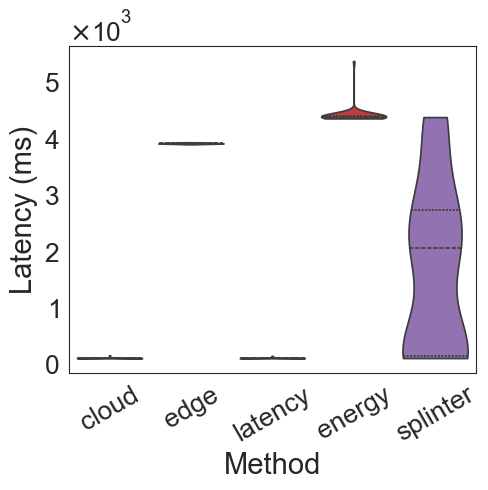

In [127]:
# Replace 'splinter:latency' with 'splinter' in the data
data_vit['strategy'] = data_vit['strategy'].replace({'splinter:latency': 'splinter'})

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['cloud', 'edge', 'latency', 'energy', 'splinter']
palette_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='latency',
    data=data_vit,
    ax=ax,
    inner='quart',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    #saturation=1,
    #linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('Latency (ms)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('latency_vit.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Energy for VGG16

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\3477165921.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


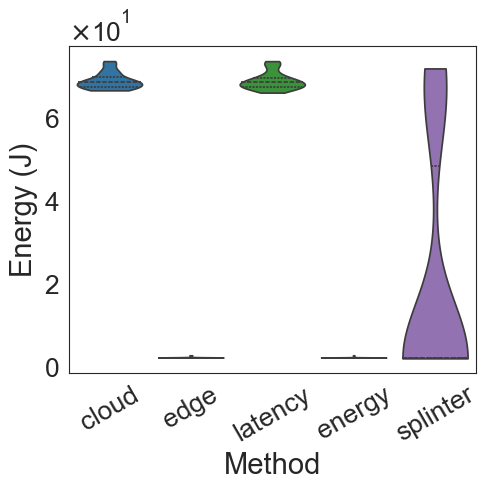

In [128]:
# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['cloud', 'edge', 'latency', 'energy', 'splinter']
palette_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='energy',
    data=data,
    ax=ax,
    inner='quart',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    #saturation=1,
    #linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('Energy (J)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('energy_vgg16.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [141]:
data_vit

,accuracy,latency,energy,avg energy edge (J),avg latency edge (ms),avg latency cloud (ms),avg latency transfer (ms),avg energy cloud (J),avg energy cloud gpu (J),utilization cloud cpu (%),...,utilization edge cpu (%),tensor size (KB),index,qos,strategy,cpu-freq,layer,edge-accelerator,server-accelerator,violation
0,0.699,133.558466,92.414886,0.408408,20.797592,101.390802,11.370072,92.006477,6.811839,1.7,...,39.0,588.025391,0,3527.273185,cloud,1800,0,off,True,-3393.714719
1,0.699,3920.604365,18.429247,18.429247,3920.604355,0.000000,0.000000,0.000000,0.000000,0.0,...,25.1,0.000000,0,3527.273185,edge,1800,19,off,False,393.331179
2,0.699,4389.100825,81.720108,18.627129,4308.991191,70.183806,9.925828,63.092979,4.192639,1.7,...,25.1,591.021484,0,3527.273185,energy,1600,16,off,True,861.827640
3,0.699,115.834311,89.464961,0.367373,8.289239,97.251392,10.293680,89.097588,6.657328,1.7,...,86.3,588.025391,0,3527.273185,latency,1400,0,off,True,-3411.438874
4,0.699,3292.544531,85.513648,12.342177,3201.422681,80.598549,10.523301,73.171471,5.154576,1.8,...,25.2,591.021484,0,3527.273185,splinter,1200,11,off,True,-234.728654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.699,116.821433,91.563015,0.359883,7.897914,97.255319,11.668200,91.203133,6.651376,1.8,...,79.4,588.025391,49,1606.246871,cloud,1800,0,off,True,-1489.425437
246,0.699,3931.437443,16.829175,16.829175,3931.437433,0.000000,0.000000,0.000000,0.000000,0.0,...,25.1,0.000000,49,1606.246871,edge,1800,19,off,False,2325.190573
247,0.699,4387.318777,81.503486,16.881820,4305.078177,71.361945,10.878654,64.621666,4.291741,1.7,...,25.1,591.021484,49,1606.246871,energy,1600,16,off,True,2781.071906
248,0.699,119.894860,92.168995,0.336231,8.321528,100.018056,11.555276,91.832764,6.903023,1.7,...,86.1,588.025391,49,1606.246871,latency,1400,0,off,True,-1486.352011


In [213]:
data[data['strategy'].isin( ['splinter'])]['energy'].max()

np.float64(71.96432851163387)

In [212]:
data_vit[data_vit['strategy'].isin( ['splinter'])]['energy'].median()

np.float64(89.05195902304425)

# Energy for ViT

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\478774235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


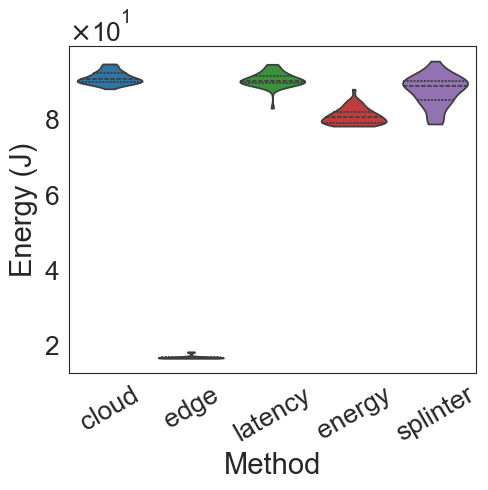

In [129]:
# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Define the desired order and colors for each strategy
strategy_order = ['cloud', 'edge', 'latency', 'energy', 'splinter']
palette_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create the violin plot with the specified order and colors
sns.violinplot(
    x='strategy',
    y='energy',
    data=data_vit,
    ax=ax,
    inner='quart',
    order=strategy_order,
    cut=0,
    density_norm='width',
    palette=palette_colors,
    #saturation=1,
    #linewidth=0.5,
)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('Energy (J)', fontsize=label_font_size)

# Rotate x-tick labels and set font size
for label in ax.get_xticklabels():
    label.set_rotation(30)
    label.set_fontsize(tick_font_size)

# Set y-axis properties
ax.tick_params(axis='y', labelsize=tick_font_size)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and save the plot
fig.tight_layout()
plt.savefig('energy_vit.pdf', format='pdf', bbox_inches='tight')
plt.show()

# QoS violations for VGG16

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\223486980.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='quart',
C:\Users\danie\AppData\Local\Temp\ipykernel_26172\223486980.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(strategy_order, rotation=30, ha='center', fontsize=tick_font_size)


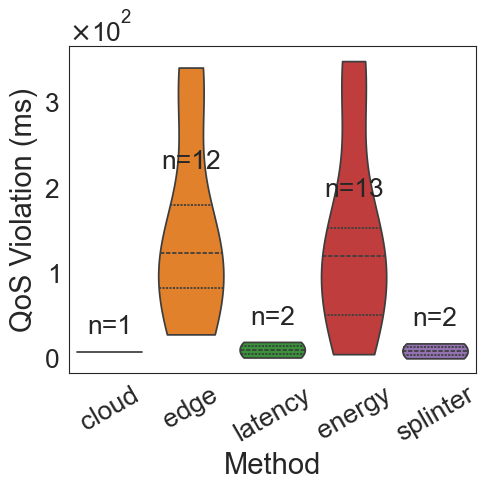

In [191]:
# Calculate violations and violation distributions
data['violation'] = data['latency'] - data['qos']
violation_data = data[data['violation'] > 0]

# Count the number of violations for each strategy
violation_counts = violation_data['strategy'].value_counts()

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the violation distribution as a violin plot in the specified order
sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='quart',
               order=strategy_order,
               cut=0,
               density_norm='width',
               palette=palette_colors,
               #saturation=1,
               #linewidth=0.5, 
               )

# Add annotation for the number of violations with adjusted positions
for i, strategy in enumerate(strategy_order):
    if strategy in violation_counts:
        count = violation_counts[strategy]
        # Define the position for the annotation based on the strategy
        if strategy in ['cloud', 'latency', 'splinter', 'splinter (exh.)']:
            # Place the text above the upper whisker
            max_violation = violation_data[violation_data['strategy'] == strategy]['violation'].max()
            position = max_violation + 20
        else:
            # Calculate the IQR and place the text between the upper box edge and the upper whisker for 'edge' and 'energy'
            q1 = violation_data[violation_data['strategy'] == strategy]['violation'].quantile(0.25)

            q3 = violation_data[violation_data['strategy'] == strategy]['violation'].quantile(0.75)
            iqr = q3 - q1
            upper_whisker = q3 + 1.5 * iqr
            position = q3 + (upper_whisker - q3) / 2
            if strategy == 'edge':
                position = position - 30
            else:
                position = position - 40

        ax.text(i, position, f'n={count}', ha='center', fontsize=tick_font_size)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('QoS Violation (ms)', fontsize=label_font_size)
ax.set_xticklabels(strategy_order, rotation=30, ha='center', fontsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)

# Use scientific notation for the y-axis
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axis
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and display the plot
fig.tight_layout()
plt.savefig('violation_vgg16.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [199]:
violation_data[violation_data['strategy'] == 'splinter']['violation'].median()

np.float64(1066.4531624058875)

# QoS Violations for ViT

In [193]:
# Calculate violations and violation distributions
data_vit['violation'] = data_vit['latency'] - data_vit['qos']
violation_data = data_vit[data_vit['violation'] > 0]
# Count the number of violations for each strategy
violation_counts = violation_data['strategy'].value_counts()
violation_counts['latency'] = 0

C:\Users\danie\AppData\Local\Temp\ipykernel_26172\134332314.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='quart',
C:\Users\danie\AppData\Local\Temp\ipykernel_26172\134332314.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(strategy_order, rotation=30, ha='center', fontsize=tick_font_size)


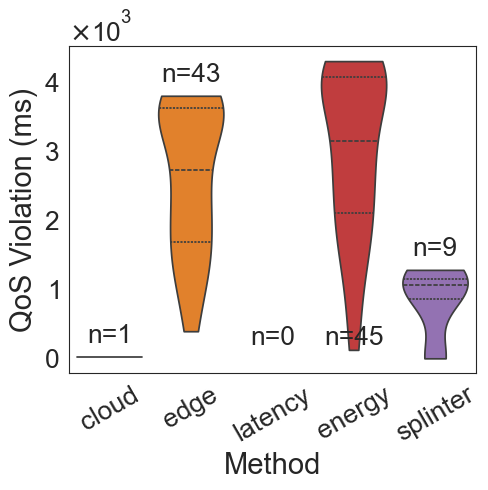

In [132]:

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the violation distribution as a violin plot in the specified order
sns.violinplot(x='strategy', y='violation', data=violation_data, ax=ax, inner='quart',
               order=strategy_order,
               cut=0,
               density_norm='width',
               palette=palette_colors,
               #saturation=1,
               #linewidth=0.5, 
 )

# Add annotation for the number of violations with adjusted positions
for i, strategy in enumerate(strategy_order):
    if strategy in violation_counts:
        count = violation_counts[strategy]
        # Define the position for the annotation based on the strategy
        if strategy in ['cloud', 'splinter']:
            # Place the text above the upper whisker
            max_violation = violation_data[violation_data['strategy'] == strategy]['violation'].max()
            position = max_violation + 200
        elif strategy == 'latency':
            position = 200
        elif strategy == 'energy':
            position = 200
        else:
            position = 4000

        ax.text(i, position, f'n={count}', ha='center', fontsize=tick_font_size)

# Set labels and font sizes
ax.set_xlabel('Method', fontsize=label_font_size)
ax.set_ylabel('QoS Violation (ms)', fontsize=label_font_size)
ax.set_xticklabels(strategy_order, rotation=30, ha='center', fontsize=tick_font_size)
ax.tick_params(axis='y', labelsize=tick_font_size)

# Use scientific notation for the y-axis
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axis
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Adjust layout and display the plot
fig.tight_layout()
plt.savefig('violation_vit.pdf', format='pdf', bbox_inches='tight')
plt.show()